## Modelo de Regresión Logística para predecir supervivencia en el Titanic
Presentado por: Gabriel Arcángel Giraldo García

Curso: Análisis de Datos

Pregrado: Ingeniería de Sistemas

In [97]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [99]:
# Cargar el data set para analizarlo y ajustarlo
df = pd.read_csv('./Titanic-Dataset.csv')

In [101]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


El conjunto de datos tiene 12 variables así: PassengerId (Primary key),	Survived (Sobrevivio 0 No, 1 Si), Pclass (Clase 1, 2 o 3), Name (nombre), Sex (sexo male y female),	Age (edad),	SibSp (# hermanos y Conyugue),	Parch (# padres e hijos), Ticket (# Ticket),	Fare (precio ticket),	Cabin (# Cabina) y	Embarked (sitio de embarque S-Southampton, C-Cherburgo y Q-Queenstown)

In [104]:
# Estadísticas descriptivas de variables numéricas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [106]:
# Información sobre tipos de datos y valores no nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Se evidencia que en total son 891 registros, donde existen valores nulos en Age, Cabin y Embarked, así mismo se observa que hay 7 variables numéricas (5 enteros y 2 float), y 5 variables de tipo object (texto).

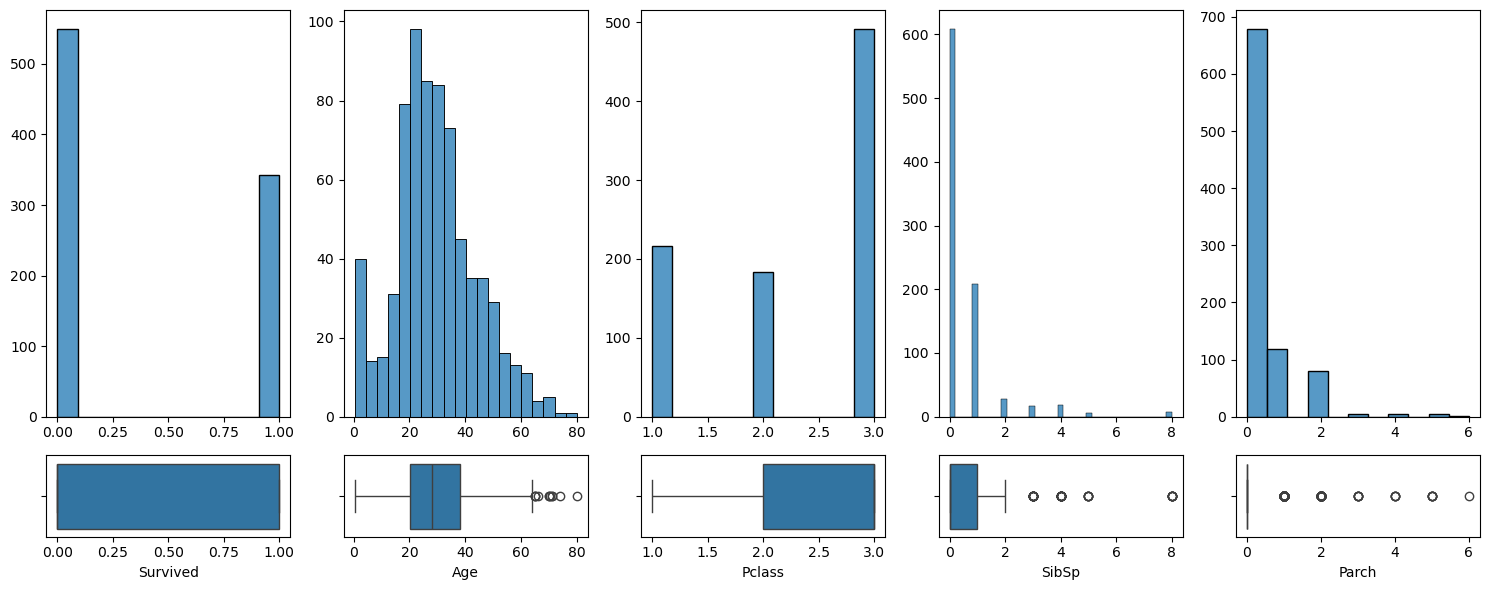

In [109]:
# Identificación de valores Atípicos
# Diagramas para analizar y detectar valores atípicos en Survived, Age, Pclass, SibSp y Parch

fig, axis = plt.subplots(2, 5, figsize = (15, 6), gridspec_kw={'height_ratios': [5, 1]})

# Creación de un histograma múltiple
sns.histplot(ax = axis[0,0], data = df, x = "Survived").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,0], data = df, x = "Survived")
sns.histplot(ax = axis[0,1], data = df, x = "Age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,1], data = df, x = "Age")
sns.histplot(ax = axis[0,2], data = df, x = "Pclass").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,2], data = df, x = "Pclass")
sns.histplot(ax = axis[0,3], data = df, x = "SibSp").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,3], data = df, x = "SibSp")
sns.histplot(ax = axis[0,4], data = df, x = "Parch").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,4], data = df, x = "Parch")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

No existen valores atípicos en la variable Survived.

Así mismo en cuanto a la edad, la mayoría de los pasajeros oscilaban edades entre los 20 y 40 años, y se muestran valores atípicos para las personas mayores de 60 años, puesto que eran muy pocos, y el pasajero de mayor edad se encontraba con 80 años, lo cual es acorde, por lo cual no se estima imputar esta variable.

En la variable de Pclass (clase), se evidencia que existían 3 categorías y que casi la mitad de pasajeros viajaban en clase 3, no se evidencian valores atípicos en esta variable.

Se evidencian valores atípicos en la cantidad de familiares (SibSp y Parch), sin embargo, son valores acordes a familias de la época, pero significa que la mayoría de los pasajeros viajaban solos.

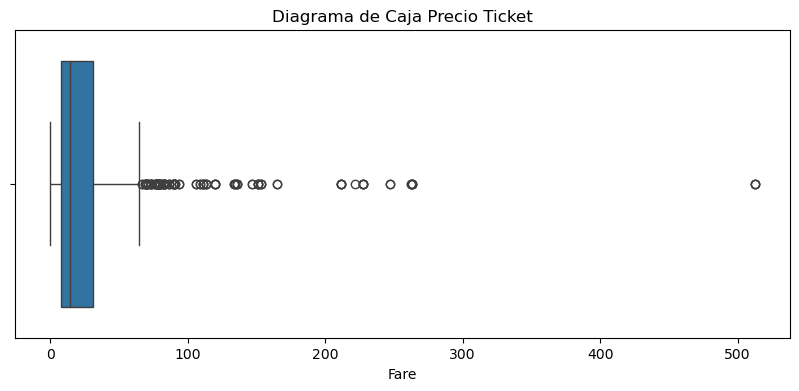

In [112]:
# Diagramas de caja para detectar valores atípicos en Fare
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Fare'])
plt.title('Diagrama de Caja Precio Ticket')
plt.show()

In [114]:
print(df[df['Fare'] > 200][['Pclass', 'Fare']])

     Pclass      Fare
27        1  263.0000
88        1  263.0000
118       1  247.5208
258       1  512.3292
299       1  247.5208
311       1  262.3750
341       1  263.0000
377       1  211.5000
380       1  227.5250
438       1  263.0000
527       1  221.7792
557       1  227.5250
679       1  512.3292
689       1  211.3375
700       1  227.5250
716       1  227.5250
730       1  211.3375
737       1  512.3292
742       1  262.3750
779       1  211.3375


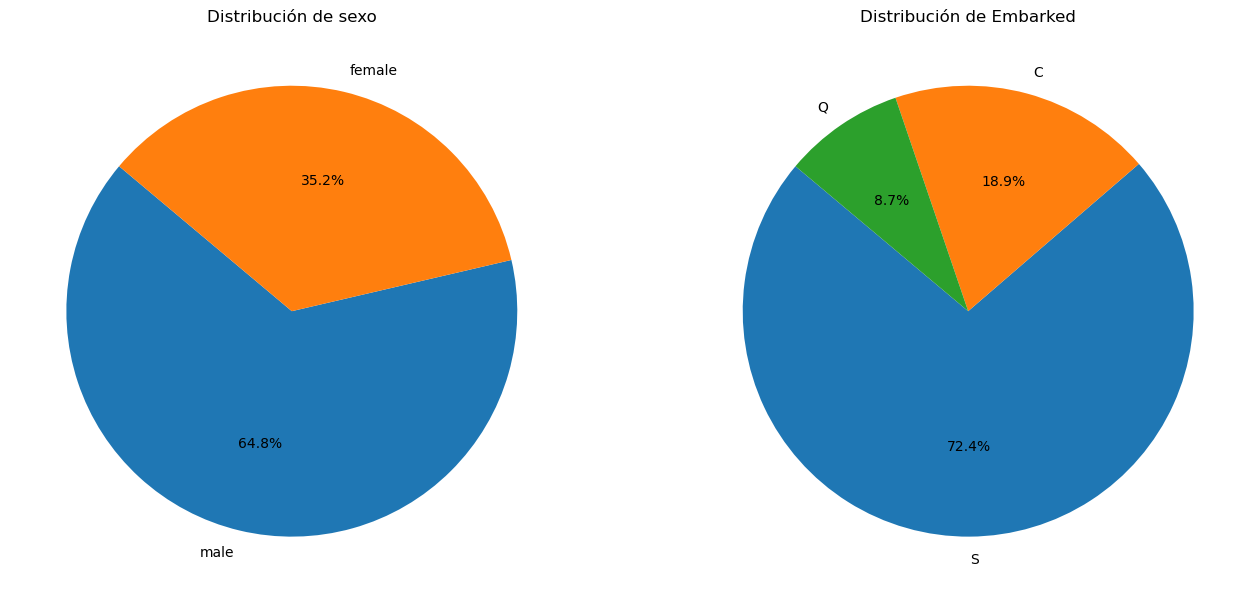

In [116]:
# Análisis de variables categóricas 

counts_sex = df['Sex'].value_counts()
counts_emb = df['Embarked'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico de torta para 'Pclass'
ax1.pie(counts_sex, labels=counts_sex.index, autopct='%1.1f%%', startangle=140)
ax1.set_title('Distribución de sexo')

# Gráfico de torta para 'Embarked'
ax2.pie(counts_emb, labels=counts_emb.index, autopct='%1.1f%%', startangle=140)
ax2.set_title('Distribución de Embarked')

plt.show()

La distribución de pasajeros por sexo era en su mayoría hombres con el 64,8% y el restante 35,2% eran mujeres, en cuanto al lugar de embarque, se puede notar que el 72,4% de personas abordaron el Titanic en el puerto de Souphanton, seguido de C con el 18,9% y finalmente el 8,7% lo hicieron desde Q

## Verifico posibles relaciones de la variable Survived con las demás

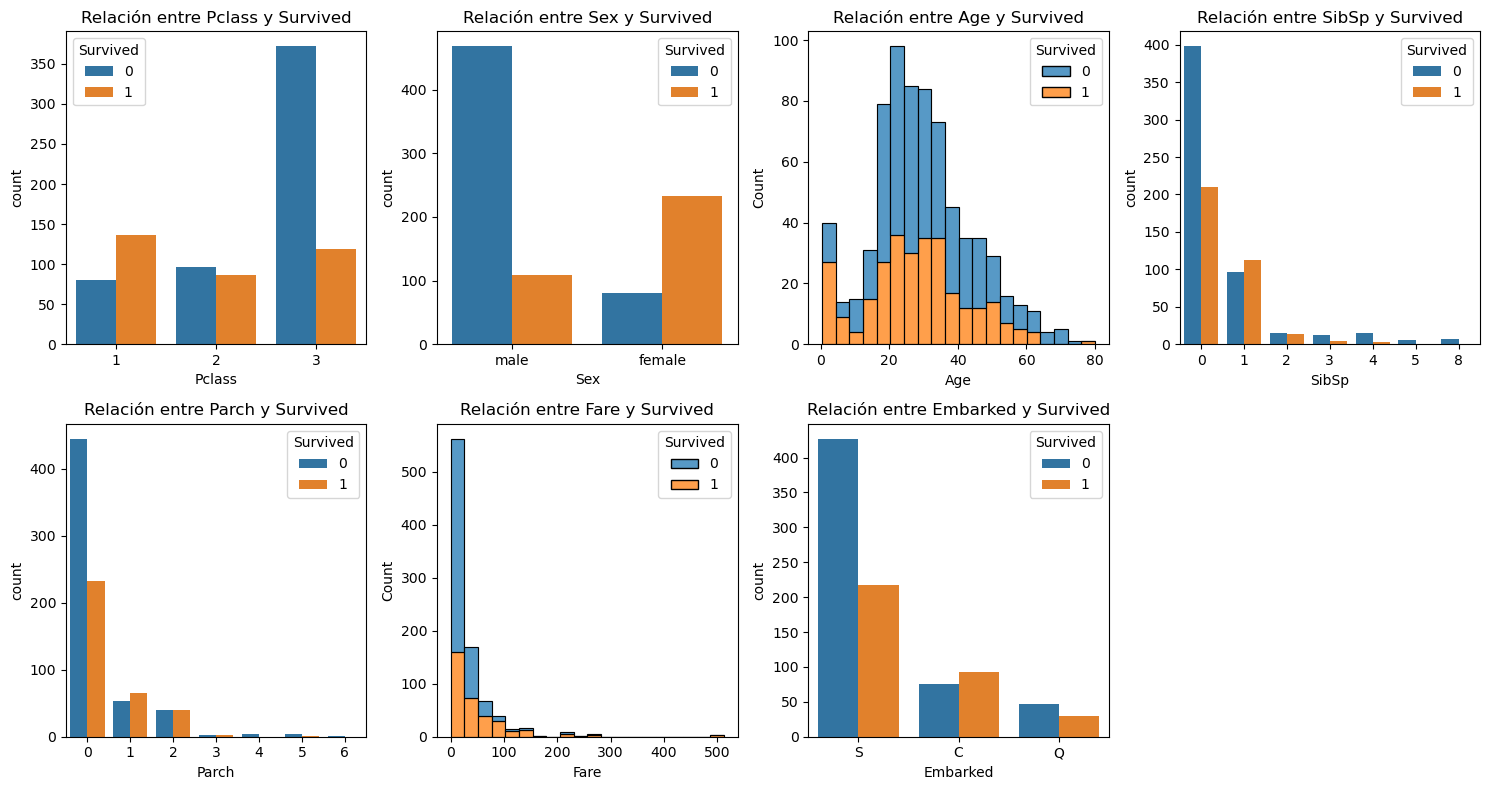

In [120]:
# Crear una figura con múltiples subplots para mostrar las relaciones
fig, axes = plt.subplots(2, 4, figsize=(15, 8))


# Relación entre 'Survived' y 'Pclass'
sns.countplot(data=df, x='Pclass', hue='Survived', ax=axes[0, 0])
axes[0, 0].set_title('Relación entre Pclass y Survived')

# Relación entre 'Survived' y 'Sex'
sns.countplot(data=df, x='Sex', hue='Survived', ax=axes[0, 1])
axes[0, 1].set_title('Relación entre Sex y Survived')

# Relación entre 'Survived' y 'Age'
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=20, ax=axes[0, 2])
axes[0, 2].set_title('Relación entre Age y Survived')

# Relación entre 'Survived' y 'SibSp'
sns.countplot(data=df, x='SibSp', hue='Survived', ax=axes[0, 3])
axes[0, 3].set_title('Relación entre SibSp y Survived')

# Relación entre 'Survived' y 'Parch'
sns.countplot(data=df, x='Parch', hue='Survived', ax=axes[1, 0])
axes[1, 0].set_title('Relación entre Parch y Survived')

# Relación entre 'Survived' y 'Fare'
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', bins=20, ax=axes[1, 1])
axes[1, 1].set_title('Relación entre Fare y Survived')

# Relación entre 'Survived' y 'Embarked'
sns.countplot(data=df, x='Embarked', hue='Survived', ax=axes[1, 2])
axes[1, 2].set_title('Relación entre Embarked y Survived')

# Eliminar eje vacío
fig.delaxes(axes[1, 3])

plt.tight_layout()
plt.show()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [122]:
# Imputo los valores atípicos de Fare con el valor promedio de los Tickets de primera clase       
df.loc[df['Fare'] > 200, 'Fare'] = df[df['Pclass'] == 1]['Fare'].mean()
print(df[df['Fare'] > 200][['Pclass', 'Fare']]) # Imprimo para verificar que ya no hay valores en estos rangos

Empty DataFrame
Columns: [Pclass, Fare]
Index: []


In [125]:
#Identificación de Datos Duplicados.
print(f' La cantidad de registros duplicados es: ', df.duplicated().sum())

 La cantidad de registros duplicados es:  0


Se evidencia que no existen valores duplicados

In [128]:
#Identificación de Datos Faltantes
print(df.isna().sum().sort_values(ascending=False))

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


Existen en su orden 687 campos vacios en Cabin, 177 en Age y 2 en Embarked, de estos valores se debe imputar Age y Embarked ya que Cabin no es relevante para el modelo en construcción

In [132]:
# Se eliminan las columnas que no son relevantes para el modelo (PassengerId, Name, Ticket y Cabin)

df_filtrado = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [134]:
df_filtrado.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [136]:
# Se imputan los valores faltantes en Age con la media y Embarked con la moda

df_filtrado["Age"].fillna(df_filtrado["Age"].mean(), inplace = True)
df_filtrado["Embarked"].fillna(df_filtrado["Embarked"].mode()[0], inplace = True)

print(df_filtrado.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_64856\2500376522.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtrado["Age"].fillna(df_filtrado["Age"].mean(), inplace = True)
C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_64856\2500376522.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

De esta manera ya no existen valores nulos

In [27]:
# Inspecciono las variables categóricas para asignar valores numéricos ya que este modelo solo acepta valores numpericos
print(df_filtrado['Sex'].unique())
print(df_filtrado['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [28]:
# Creo un diccionario con las clases Sex existentes y sus indices + 1 para reemplazar sus valores
dic_sex = {sex: f'{i+1}' for i, sex in enumerate(df_filtrado['Sex'].unique())}
print(dic_sex)

# Creo un diccionario con las clases de Embarked existentes y sus indices + 1 para reemplazar sus valores
dic_emb = {embarked: f'{i+1}' for i, embarked in enumerate(df_filtrado['Embarked'].unique())}
print(dic_emb)

{'male': '1', 'female': '2'}
{'S': '1', 'C': '2', 'Q': '3'}


In [29]:
# Reemplazo las categorias por los valores creados en cada diccionario

df_filtrado['Sex'] = df_filtrado['Sex'].replace(dic_sex)
df_filtrado['Embarked'] = df_filtrado['Embarked'].replace(dic_emb)

In [30]:
df_filtrado.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,1
1,1,1,2,38.000000,1,0,71.2833,2
2,1,3,2,26.000000,0,0,7.9250,1
3,1,1,2,35.000000,1,0,53.1000,1
4,0,3,1,35.000000,0,0,8.0500,1
5,0,3,1,29.699118,0,0,8.4583,3
6,0,1,1,54.000000,0,0,51.8625,1
7,0,3,1,2.000000,3,1,21.0750,1
8,1,3,2,27.000000,0,2,11.1333,1
9,1,2,2,14.000000,1,0,30.0708,2


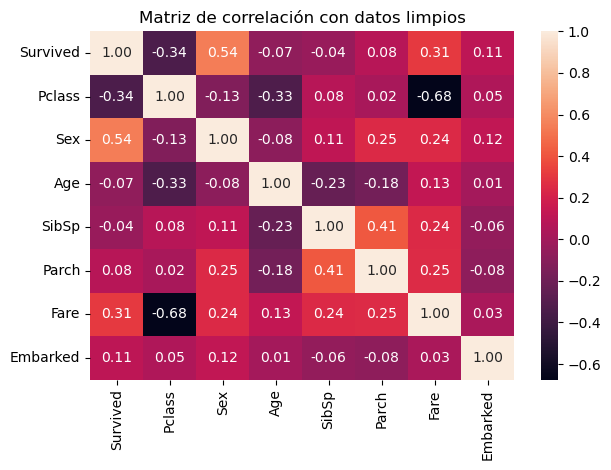

In [31]:
# Mostramos las correlaciones con los datos limpios

sns.heatmap(df_filtrado.corr(),annot = True, fmt = ".2f")
plt.title('Matriz de correlación con datos limpios')
plt.tight_layout()

plt.show()

## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

En este caso de estudio la variable Survived define con 0 que Murió y 1 Sobrevivió, por lo cual es la variable dependiente.

Las demás variables (7) aportan información valiosa para el entrenamiento y están aptas para iniciar el modelado

In [34]:
# Contamos de la varuiable dependiente la cantidad de observaciones en cada valor
df_filtrado['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [36]:
# Primer Modelo (train) = 75%, (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = df_filtrado.drop('Survived',axis=1) # Datos sin variable dependiente  
Y = df_filtrado['Survived'] # Datos variable dependiente

In [37]:
# Establecer cuál es el porcentaje de entrenamiento más adecuado

opc_size = [0.25, 0.24, 0.23, 0.22, 0.21, 0.2] # Opciones para testear el modelo
mejor_precision = mejor_exactitud = mejor_recuperacion = mejor_f1 = 0
mejor_sizeP = mejor_sizeE = mejor_sizeR = mejor_sizeF = 0

for n in opc_size:
    #La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=n, stratify=Y, random_state= 0)
    
    modelo = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
    modelo.fit (X_train , Y_train)  # Se entrena con los datos destinados
    prediccion = modelo.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación
    
    precision = precision_score(Y_test, prediccion)
    exactitud = accuracy_score(Y_test, prediccion)
    recuperacion = recall_score(Y_test, prediccion)
    f1 = f1_score(Y_test, prediccion)
    auc_roc = roc_auc_score(Y_test, prediccion)
    
    if precision > mejor_precision:
        mejor_precision = precision
        mejor_sizeP = n

    if exactitud > mejor_exactitud:
        mejor_exactitud = exactitud
        mejor_sizeE = n

    if recuperacion > mejor_recuperacion:
        mejor_recuperacion = recuperacion
        mejor_sizeR = n

    if f1 > mejor_f1:
        mejor_f1 = f1
        mejor_sizeF = n

print(f"Mejor valor para test_size Precisión: {mejor_sizeP}")
print(f"Mejor valor para test_size Exactitud: {mejor_sizeE}")
print(f"Mejor valor para test_size Recuperación: {mejor_sizeR}")
print(f"Mejor valor para test_size F1 Score: {mejor_sizeF}")

Mejor valor para test_size Precisión: 0.23
Mejor valor para test_size Exactitud: 0.23
Mejor valor para test_size Recuperación: 0.23
Mejor valor para test_size F1 Score: 0.23


De esta manera se puede observar que el modelo que mejor desempeño entrega es aquél entrenado con el 77% de las muestras y testeado con el 23%

In [39]:
# Ahora sí se realiza la división de los datos para entrenemiento 77% y test 23% conforme a los resultados anteriores
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.23, stratify=Y, random_state= 0)

## 5. Entrenamiento del modelo de Regresión Logística¶

In [41]:
# Construir el modelo de regresión logística 

modelo = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión

# Se entrena con los datos destinados
modelo.fit (X_train , Y_train)   

# Crea el modelo de prediccion con los datos de test
prediccion = modelo.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [42]:
# Verifico las predicciones
print(prediccion)

[1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1
 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0
 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0]


## 6 Evaluación del modelo de regresion creado

In [44]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,prediccion))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       126
           1       0.77      0.67      0.72        79

    accuracy                           0.80       205
   macro avg       0.79      0.77      0.78       205
weighted avg       0.79      0.80      0.79       205



Exactitud (Accuracy):

Interpretació El modelo tiene una la exacti de es80.9lo cual 0, significa que 8l 90% de las predicciones del modelo son correc (tanto verdaderos positivos como verdaderos negativos) sobre el total de predicciones.
as.
Precisión (Precision):

InterpretatLo: Si la precisión1eslo cual  0.80, significa q1e el 80% de las predicciones positivas del modelo son co, indicando un desempeño adecuado para esta métrica, ya que el modelo tiene pocos falsos positivos.
rectas.
Recuperación (Recall) o Sensibilidad:

Interp
En el modelo emplo: Si la recuper87iólo que indica, signif87a que el 75% de los casos positivos reales fueron correctamente identificados po, es decir, el modelo tiene pocos falsos negativos.

el modelo.
Puntuación F1 (F1 Score):

IneLa
Ejemplo: Si la pude nt84ción F1 es ndo que este gnifica que el m tiene un badecuado uen equilibrio entre precisión itivas y negativas.

## 7 Graficas del modelo

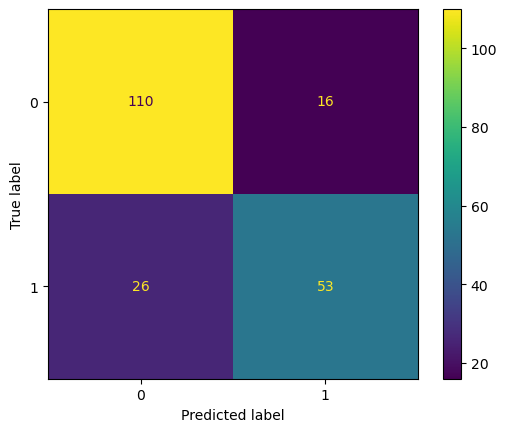

In [86]:
#Matrix de Confusión del modelo
cm=confusion_matrix(Y_test,prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

El modelo desarrollado identificó adecuadamente 110 verdaderos negativos de 136, ya que 26 valores que debían de ser negativos fueron clasificados erróneamente como positivos, así mismo, el modelo identificó acertadamente 53 verdaderos positivos de 69 existentes, es decir, los restantes 16 que eran negativos el modelo los identificó como positivos; esto demuestra que el modelo tiene un desempeño adecuado como se pudo establecer con las métricas analizadas anteriormente, y que en más del 80% de las predicciones fue acertado; sin embargo, no es óptimo y se debe establecer otros mecanismos para su mejoramiento.

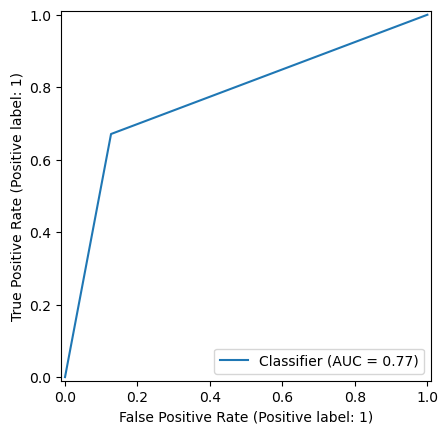

In [82]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, prediccion)
plt.show()

Área bajo la curva ROC (AUC-ROC):

Interpretación: 
Para el modelo realizado el valor del AUC-ROC es 0.77, significa que el modelo tiene una aceptable, pero no óptima capacidad para distinguir entre las clases positivas y negativas.

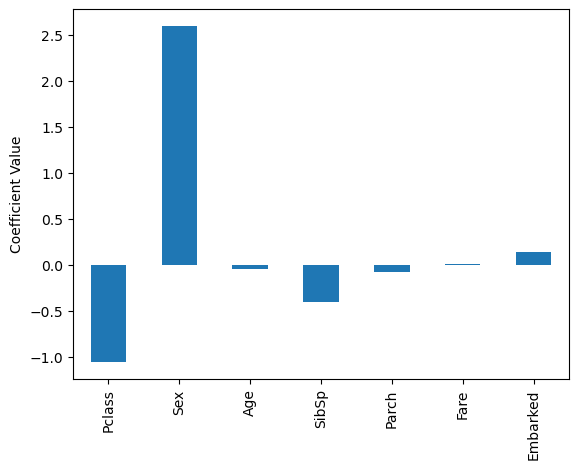

In [49]:
coefficients = pd.DataFrame(modelo.coef_.T, X_train.columns, columns=['Coefficient'])
coefficients.plot(kind='bar', legend=False)
plt.ylabel("Coefficient Value")
plt.show()

Este gráfico de coeficientes muestra la importancia de cada variable independiente del modelo, dejando ver que la variable sex fue la que más influyó sobre la probabilidad de la predicción, caso contrario a la variable Pclass y SibSp que son las que más disminuyeron esta probabilidad.